In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
car_df = pd.read_csv('cars.csv')

In [5]:
brand_df = pd.read_csv('brand.csv')

In [6]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [7]:
# 데이터 병합 merged_df로
car_df['brand'] = car_df['title'].apply(lambda x: x.split()[0])

brand_df.rename({'title':'brand'},axis=1,inplace=True)

brand_df['brand'] = brand_df['brand'].apply(lambda x: x.upper())

merged_df = car_df.merge(brand_df, on='brand' ,how='inner')

In [8]:
# Engine 컬럼전처리
merged_df['Engine'] = merged_df['Engine'].apply(lambda x: float(str(x).replace('L','')))

In [9]:
# Emission Class 컬럼 전처리
merged_df['Emission Class'] = merged_df[~(merged_df['Emission Class'].isna())]['Emission Class'].apply(lambda x: x.split()[-1])

merged_df['Emission Class'] = merged_df[~(merged_df['Emission Class'].isna())]['Emission Class'].apply(lambda x: int(x))

In [10]:
# Service history 변수의 결측치는 'Unknown'으로 채우기
merged_df['Service history'].fillna('Unknown', inplace=True) 

In [11]:
# 결측치 비율 0.382696이 무조건 삭제할 정도로 높은지 모르겠다.
# 이 피처가 중요한 피처라면 삭제하면 안되지 않나.
# price와의 상관관계를 보니 중요한 거 같다. 대체를 해보자.
# Registration_Year가 높으면 (최신일수록),  Previous Owners는 적을 거 같다.
# 뭔가 관계로 대체하고싶지만 복잡하니까 모드값으로

## 빈도 그래프
correlations = merged_df.dropna(subset=['Previous Owners']).corr()['Previous Owners']
correlations.drop('Previous Owners', errors='ignore') 

C:\Users\82104\AppData\Local\Temp\ipykernel_16784\1930617745.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.dropna(subset=['Previous Owners']).corr()['Previous Owners']


Price               -0.479424
Mileage(miles)       0.316160
Registration_Year   -0.501045
Engine               0.195676
Doors               -0.153262
Seats               -0.029338
Emission Class      -0.476526
Name: Previous Owners, dtype: float64

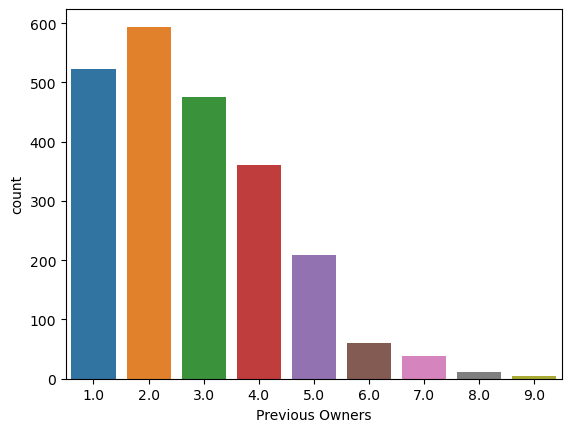

In [12]:
sns.countplot(data=merged_df, x='Previous Owners')
mode_value = merged_df['Previous Owners'].mode()[0]
merged_df['Previous Owners'].fillna(mode_value, inplace=True) 

In [13]:
# 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.
# 행 기준으로 결측치 4개인 데이터 제거
# 3개는?..
null_4_index = merged_df[merged_df['Engine'].isna()&merged_df['Doors'].isna()&merged_df['Seats'].isna()&merged_df['Seats'].isna()].index
merged_df = merged_df.drop(index=null_4_index)
merged_df = merged_df.dropna()

<Axes: ylabel='Mileage(miles)'>

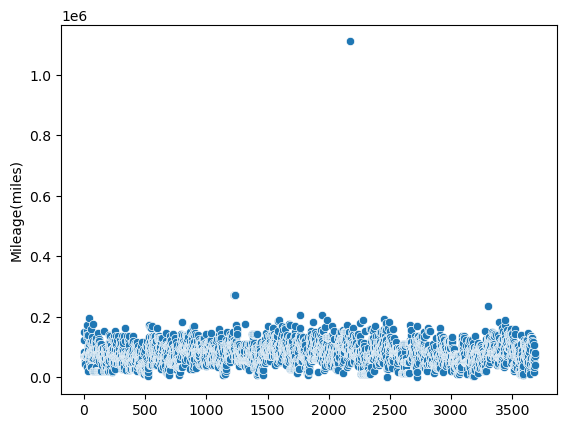

In [14]:
# 크게 보이는 이상치는 Mileage(miles)의 1개
sns.scatterplot(data=merged_df, x=merged_df.index, y=merged_df['Mileage(miles)'])

In [15]:
# 제거
merged_df = merged_df.drop(index=merged_df[merged_df['Mileage(miles)'] > 1e6].index)

In [16]:
# 원핫인코딩
# 일단 object 조사 1.title, 2.Fuel type, 3.Body type, 4.Gearbox, 5.Service history, 6.brand, 7.country
# 이 중에서 unique값이 많으면 줄인다.
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 3684
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3592 non-null   object 
 1   Price              3592 non-null   int64  
 2   Mileage(miles)     3592 non-null   int64  
 3   Registration_Year  3592 non-null   int64  
 4   Previous Owners    3592 non-null   float64
 5   Fuel type          3592 non-null   object 
 6   Body type          3592 non-null   object 
 7   Engine             3592 non-null   float64
 8   Gearbox            3592 non-null   object 
 9   Doors              3592 non-null   float64
 10  Seats              3592 non-null   float64
 11  Emission Class     3592 non-null   float64
 12  Service history    3592 non-null   object 
 13  brand              3592 non-null   object 
 14  country            3592 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 449.0+ KB


In [17]:
# title은 가격예측할 때 되게 중요할 수 있다고 생각이 드는데, 
# 원핫 인코딩이 하고 싶기때문에 brand로 묶인다 생각하고 제거.
merged_df['title'].value_counts()

VAUXHALL CORSA                      222
FORD FOCUS                          161
VAUXHALL ASTRA                      154
FORD FIESTA                         128
BMW 3 SERIES                        115
                                   ... 
KIA CEED DIESEL HATCHBACK             1
KIA XCEED                             1
KIA SPORTAGE ESTATE                   1
KIA XCEED HATCHBACK                   1
VOLKSWAGEN GOLF DIESEL HATCHBACK      1
Name: title, Length: 423, dtype: int64

In [18]:
# 2.Fuel type #하이브리드를 묶자. 몇개 안됨.
merged_df['Fuel type'].value_counts()

Petrol                   2318
Diesel                   1206
Petrol Hybrid              41
Petrol Plug-in Hybrid      26
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [19]:
# 처리
merged_df['Fuel type'] = merged_df['Fuel type'].apply(lambda x: 'Hybrid' if x.split()[-1] == 'Hybrid' else x)

In [20]:
# 3. Body type # 밴과 픽업트럭.. 
Body_type_ratios = merged_df['Body type'].value_counts()/len(merged_df['Body type'])
merged_df['Body type'] = merged_df['Body type'].apply(lambda x: 'Others' if Body_type_ratios[x] < 0.02 else x)
merged_df['Body type'].value_counts()

Hatchback      2223
SUV             459
Saloon          354
Estate          167
MPV             148
Coupe           133
Convertible     104
Others            4
Name: Body type, dtype: int64

In [21]:
# 4.Gearbox
merged_df['Gearbox'].value_counts()

Manual       2844
Automatic     748
Name: Gearbox, dtype: int64

In [22]:
# 5.Service history
merged_df['Service history'].value_counts()

Unknown    3058
Full        534
Name: Service history, dtype: int64

In [23]:
# 6.brand, title까지 지울건데 brand까지 지우면 안되지 않을까요? 너무 많으니까 2프로 이하
brand_ratios = merged_df['brand'].value_counts() / len(merged_df)
merged_df['brand'] = merged_df['brand'].apply(lambda x: 'Others' if brand_ratios[x] < 0.02 else x)

In [24]:
# 7.country 
country_ratios = merged_df['country'].value_counts()/len(merged_df['country'])
merged_df['country'] = merged_df['country'].apply(lambda x: 'Others' if country_ratios[x] < 0.02 else x)

In [25]:
# title drop
merged_df_1 = merged_df.drop(columns='title')

In [26]:
# 원핫인코딩
merged_df_2 = pd.get_dummies(merged_df_1, columns=['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'country'], drop_first= True)

In [27]:
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(merged_df_2)
ss_df = pd.DataFrame(ss.transform(merged_df_2), columns = merged_df_2.columns)

In [28]:
# PCA
ss_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Hybrid,Fuel type_Petrol,...,brand_TOYOTA,brand_VAUXHALL,brand_VOLKSWAGEN,country_Germany,country_Italy,country_Japan,country_Others,country_South Korea,country_United Kingdom,country_United States
0,0.245251,-0.309807,0.853301,0.390439,-0.418315,0.690602,0.1757,1.202927,-0.138911,-1.348876,...,-0.234349,-0.422924,-0.279919,-0.552908,-0.191448,-0.443323,4.316065,-0.228338,-0.499826,-0.37217
1,0.245251,-0.309807,0.853301,0.390439,-0.418315,0.690602,0.1757,1.202927,-0.138911,-1.348876,...,-0.234349,-0.422924,-0.279919,-0.552908,-0.191448,-0.443323,4.316065,-0.228338,-0.499826,-0.37217
2,-0.842300,1.930718,-1.045874,-0.392619,0.611701,0.690602,0.1757,-1.015201,-0.138911,-1.348876,...,-0.234349,-0.422924,-0.279919,-0.552908,-0.191448,-0.443323,4.316065,-0.228338,-0.499826,-0.37217
3,-0.841193,0.077907,-0.834855,-0.392619,-0.418315,0.690602,0.1757,-1.015201,-0.138911,0.741358,...,-0.234349,-0.422924,-0.279919,-0.552908,-0.191448,-0.443323,4.316065,-0.228338,-0.499826,-0.37217
4,-0.730444,1.204697,-0.201796,0.390439,-0.830321,0.690602,0.1757,0.093863,-0.138911,0.741358,...,-0.234349,-0.422924,-0.279919,-0.552908,-0.191448,-0.443323,4.316065,-0.228338,-0.499826,-0.37217


In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(2)

pca_result = pca.fit_transform(merged_df_2)

In [31]:
pca.explained_variance_ratio_

array([0.98908138, 0.01091861])

In [32]:
merged_df.groupby('country')['brand'].nunique()

country
France            4
Germany           5
Italy             2
Japan             4
Others            1
South Korea       3
United Kingdom    3
United States     2
Name: brand, dtype: int64

C:\Users\82104\AppData\Local\Temp\ipykernel_16784\1319037909.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


<Axes: >

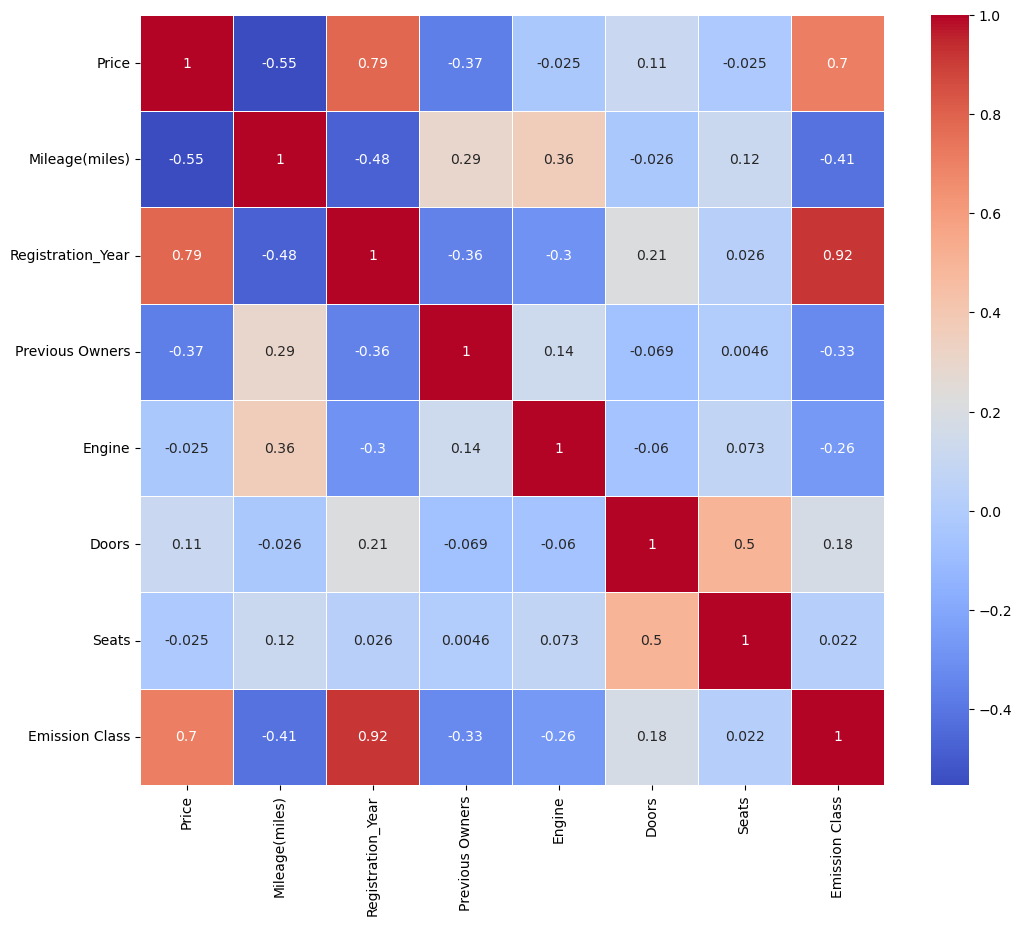

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation_matrix = merged_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

C:\Users\82104\AppData\Local\Temp\ipykernel_16784\827056701.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df_1.corr()


<Axes: >

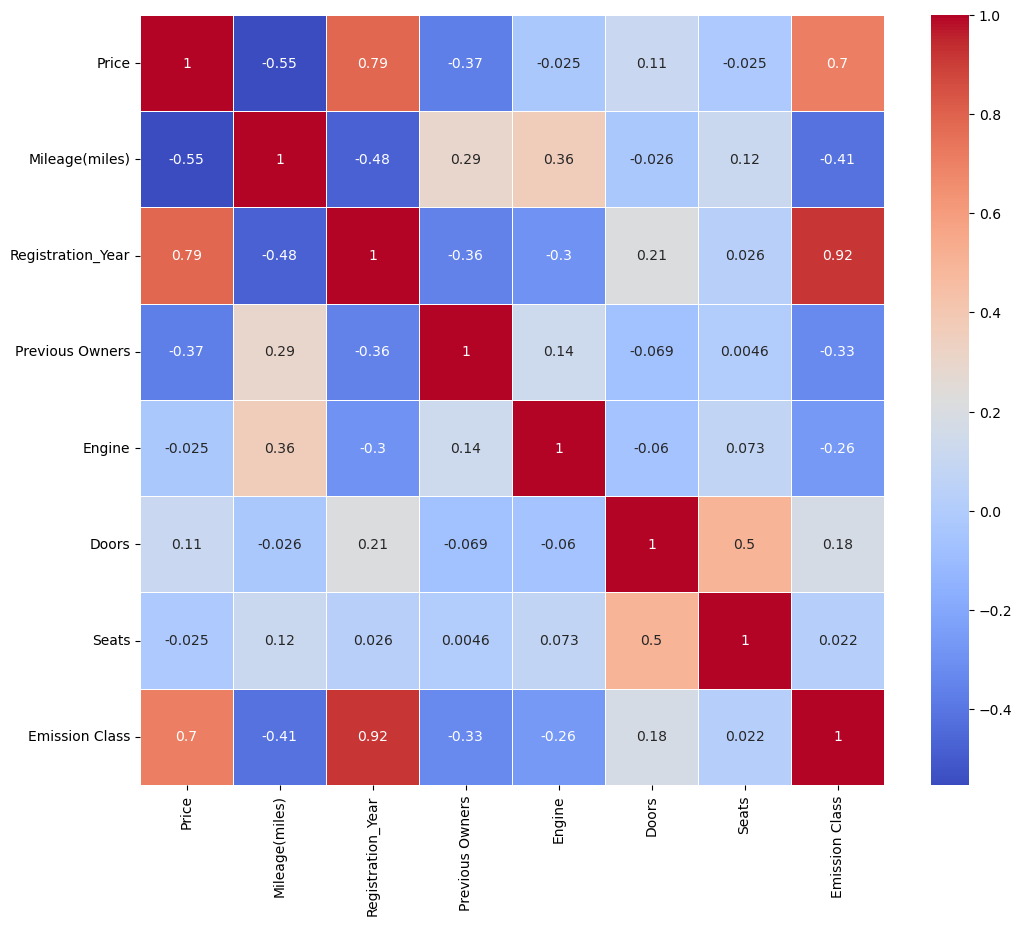

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation_matrix = merged_df_1.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)